<a href="https://colab.research.google.com/github/shuvo881/Various-Type-Model-CNN-DensNet-VGG-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Please, Don't Deep copy...***

# **Required library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plot
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

import keras.preprocessing.image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import rescale
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.applications.densenet import DenseNet201
import matplotlib.pyplot as plot
from sklearn.metrics import classification_report, confusion_matrix


# **Data Generate**



> Data preprocessing 







---



---



---







In [ ]:


train_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")


Found 1014 images belonging to 26 classes.
Found 520 images belonging to 26 classes.
Found 12 images belonging to 26 classes.


# **CNN Model**



---



---



---



---




In [ ]:


# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=26,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=5, validation_split=5, validation_data=test_ds)




Epoch 1/5
5/5 [==============================] - 180s 42s/step - loss: 2.4136 - accuracy: 0.2372 - val_loss: 10.2269 - val_accuracy: 0.0423
Epoch 2/5
5/5 [==============================] - 42s 9s/step - loss: 1.7997 - accuracy: 0.2244 - val_loss: 4.7517 - val_accuracy: 0.0404
Epoch 3/5
5/5 [==============================] - 41s 9s/step - loss: 1.5029 - accuracy: 0.2564 - val_loss: 8.9565 - val_accuracy: 0.0481
Epoch 4/5
5/5 [==============================] - 40s 9s/step - loss: 1.4868 - accuracy: 0.2949 - val_loss: 7.9054 - val_accuracy: 0.0385
Epoch 5/5
5/5 [==============================] - 39s 9s/step - loss: 1.4091 - accuracy: 0.3077 - val_loss: 6.8957 - val_accuracy: 0.0442


In [ ]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))


MODEL ACCURACY = 30.769231915473938%


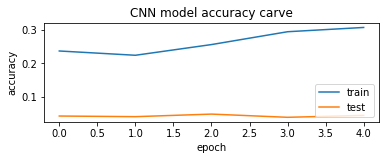

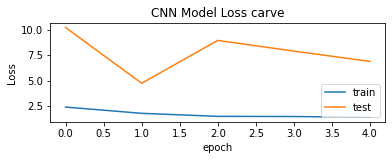

In [ ]:
plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('CNN model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()


plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('CNN Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()



1/1 [==============================] - 1s 897ms/step
Confusion matrix:



<AxesSubplot:>

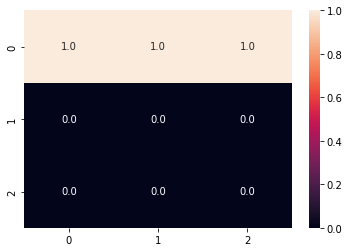

In [ ]:


# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
sns.heatmap(conf_mat, annot=True, fmt=".1f")


In [ ]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)


Confusion matrix Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.33        12
   macro avg       0.33      0.11      0.17        12
weighted avg       1.00      0.33      0.50        12



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DesNet**

---



---



---



---



In [ ]:
def build_model(backbone):
  model = Sequential()
  model.add(backbone)
  model.add(layers.GlobalAveragePooling2D())
  model.add(Dropout(0.5))
  model.add(layers.BatchNormalization())
  model.add(Flatten())
  model.add(Dense(26, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


densent = DenseNet201(weights = 'imagenet', include_top=False)
model = build_model(densent)
model.summary()
hist = model.fit_generator(train_ds, steps_per_epoch=5, epochs=5, validation_data=test_ds, validation_steps=5)

p = model.predict(val_ds)

74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization (BatchN  (None, 1920)             7680      
 ormalization)                                                   
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                       

<ipython-input-20-ea53a129da92>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_ds, steps_per_epoch=5, epochs=5, validation_data=test_ds, validation_steps=5)


Epoch 1/5
5/5 [==============================] - 206s 25s/step - loss: 3.4489 - accuracy: 0.0750 - val_loss: 5.5839 - val_accuracy: 0.0688
Epoch 2/5
5/5 [==============================] - 115s 23s/step - loss: 2.7608 - accuracy: 0.2500 - val_loss: 4.8354 - val_accuracy: 0.0750
Epoch 3/5
5/5 [==============================] - 103s 21s/step - loss: 2.2121 - accuracy: 0.3667 - val_loss: 4.8509 - val_accuracy: 0.1187
Epoch 4/5
5/5 [==============================] - 111s 23s/step - loss: 1.7193 - accuracy: 0.4812 - val_loss: 4.5134 - val_accuracy: 0.1063
Epoch 5/5
1/1 [==============================] - 5s 5s/step


In [ ]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))

MODEL ACCURACY = 52.666664123535156%


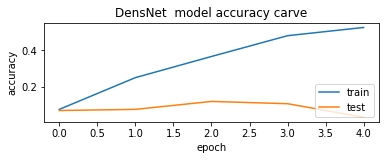

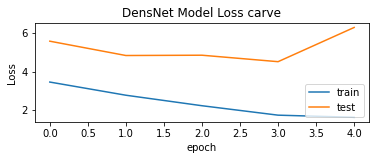

In [ ]:



plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('DensNet  model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('DensNet Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

1/1 [==============================] - 1s 1s/step


<AxesSubplot:>

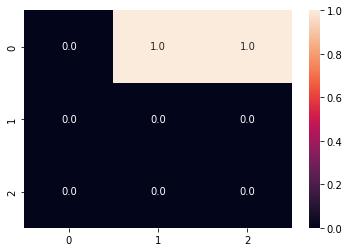

In [ ]:
# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

#print('Confusion matrix:\n', conf_mat)
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [ ]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)

Confusion matrix Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      12.0
           2       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0

    accuracy                           0.00      12.0
   macro avg       0.00      0.00      0.00      12.0
weighted avg       0.00      0.00      0.00      12.0



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

# **VGG**

---



---



---



---



In [ ]:


# Define the VGG architecture
def vgg_block(x, num_filters, num_layers):
    for i in range(num_layers):
        x = layers.Conv2D(num_filters, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2, strides=2)(x)
    return x

input_shape = (64, 64, 3)
num_classes = 26

inputs = layers.Input(shape=input_shape)
x = vgg_block(inputs, 64, 2)
x = vgg_block(x, 128, 2)
x = vgg_block(x, 256, 3)
x = vgg_block(x, 512, 3)
x = vgg_block(x, 512, 3)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(train_ds, batch_size=5, epochs=5, validation_data=test_ds)


Epoch 1/5
32/32 [==============================] - 1188s 37s/step - loss: 3.2787 - accuracy: 0.0306 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 2/5
32/32 [==============================] - 1149s 36s/step - loss: 3.2605 - accuracy: 0.0306 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 3/5
32/32 [==============================] - 1224s 38s/step - loss: 3.2605 - accuracy: 0.0316 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 4/5
32/32 [==============================] - 1253s 39s/step - loss: 3.2599 - accuracy: 0.0434 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 5/5
32/32 [==============================] - 1256s 39s/step - loss: 3.2595 - accuracy: 0.0256 - val_loss: 3.2582 - val_accuracy: 0.0385


In [ ]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))

MODEL ACCURACY = 2.5641025975346565%


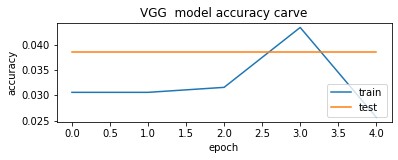

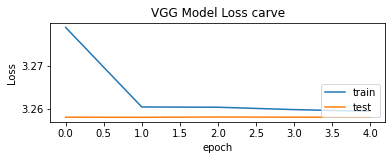

In [ ]:

plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('VGG  model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('VGG Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

1/1 [==============================] - 3s 3s/step


<AxesSubplot:>

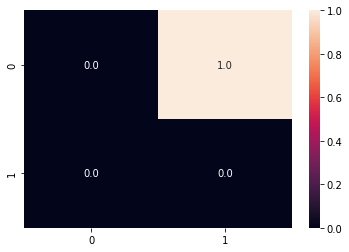

In [ ]:
# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

#print('Confusion matrix:\n', conf_mat)
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [ ]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)

Confusion matrix Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      12.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00      12.0
   macro avg       0.00      0.00      0.00      12.0
weighted avg       0.00      0.00      0.00      12.0



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1